In [102]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
from IPython.display import Image

%matplotlib inline

In [103]:
path = 'C:\\Users\\ABC\\OneDrive\\data\\pricing_predict\\data\\house_sales.csv'
# path = '/Users/sn3fru/OneDrive/data/pricing_predict/data/house_sales.csv'
# path = 'house_sales.csv'

# 1) Analise exploratória

#### Antes de mais nada vamos dar uma boa olhada no comportamento das distribuições cruzadas com a função pairplot do seaborn, com isso consigo ter uma boa ideia de quais variaveis são fortes candidatos a serem tratadas, quais tem alta correlação e quais são boas candidatas para dummies

In [104]:
df = pd.read_csv(path)

In [105]:
df.head(10)

price  num_bed  num_bath  size_house  size_lot  num_floors  \
0   221900        3      1.00        1180      5650         1.0   
1   538000        3      2.25        2570      7242         2.0   
2   180000        2      1.00         770     10000         1.0   
3   604000        4      3.00        1960      5000         1.0   
4   510000        3      2.00        1680      8080         1.0   
5  1225000        4      4.50        5420    101930         1.0   
6   257500        3      2.25        1715      6819         2.0   
7   229500        3      1.00        1780      7470         1.0   
8   323000        3      2.50        1890      6560         2.0   
9   662500        3      2.50        3560      9796         1.0   

   is_waterfront  condition  size_basement  year_built  renovation_date  \
0              0          3              0        1955                0   
1              0          3            400        1951             1991   
2              0          3              0        1933                0   
3              0          5            910        1965                0   
4              0          3              0        1987                0   
5              0          3           1530        2001                0   
6              0          3              0        1995                0   
7              0          3            730        1960                0   
8              0          3              0        2003                0   
9              0          3           1700        1965                0   

     zip   latitude   longitude  avg_size_neighbor_houses  \
0  98178  47.511234 -122.256775                      1340   
1  98125  47.721023 -122.318862                      1690   
2  98028  47.737927 -122.233196                      2720   
3  98136  47.520820 -122.393185                      1360   
4  98074  47.616812 -122.044901                      1800   
5  98053  47.656118 -122.005287                      4760   
6  98003  47.309720 -122.327049                      2238   
7  98146  47.512294 -122.336595                      1780   
8  98038  47.368407 -122.030818                      2390   
9  98007  47.600660 -122.145296                      2210   

   avg_size_neighbor_lot  
0                   5650  
1                   7639  
2                   8062  
3                   5000  
4                   7503  
5                 101930  
6                   6819  
7                   8113  
8                   7570  
9                   8925

In [106]:
df.describe()

price       num_bed      num_bath    size_house      size_lot  \
count  1.844800e+04  18448.000000  18448.000000  18448.000000  1.844800e+04   
mean   5.423624e+05      3.372615      2.118888   2083.940915  1.503602e+04   
std    3.720135e+05      0.933892      0.772384    921.416218  4.181455e+04   
min    7.800000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.218375e+05      3.000000      1.750000   1430.000000  5.050000e+03   
50%    4.500000e+05      3.000000      2.250000   1920.000000  7.600500e+03   
75%    6.480000e+05      4.000000      2.500000   2560.000000  1.062525e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

         num_floors  is_waterfront     condition  size_basement    year_built  \
count  18448.000000   18448.000000  18448.000000   18448.000000  18448.000000   
mean       1.494606       0.007643      3.411698     293.571498   1971.001138   
std        0.540806       0.087092      0.652593     443.607503     29.361619   
min        1.000000       0.000000      1.000000       0.000000   1900.000000   
25%        1.000000       0.000000      3.000000       0.000000   1952.000000   
50%        1.500000       0.000000      3.000000       0.000000   1975.000000   
75%        2.000000       0.000000      4.000000     570.000000   1997.000000   
max        3.500000       1.000000      5.000000    4820.000000   2015.000000   

       renovation_date           zip      latitude     longitude  \
count     18448.000000  18448.000000  18448.000000  18448.000000   
mean         85.145002  98077.921455     47.560030   -122.214419   
std         403.371263     53.497440      0.138557      0.139910   
min           0.000000  98001.000000     47.155933   -122.518648   
25%           0.000000  98033.000000     47.471527   -122.328084   
50%           0.000000  98065.000000     47.571599   -122.230688   
75%           0.000000  98118.000000     47.677918   -122.125733   
max        2015.000000  98199.000000     47.777624   -121.315254   

       avg_size_neighbor_houses  avg_size_neighbor_lot  
count              18448.000000           18448.000000  
mean                1988.306483           12571.596216  
std                  686.173124           26329.260211  
min                  399.000000             651.000000  
25%                 1490.000000            5100.000000  
50%                 1840.000000            7611.000000  
75%                 2370.000000           10050.000000  
max                 6110.000000          858132.000000

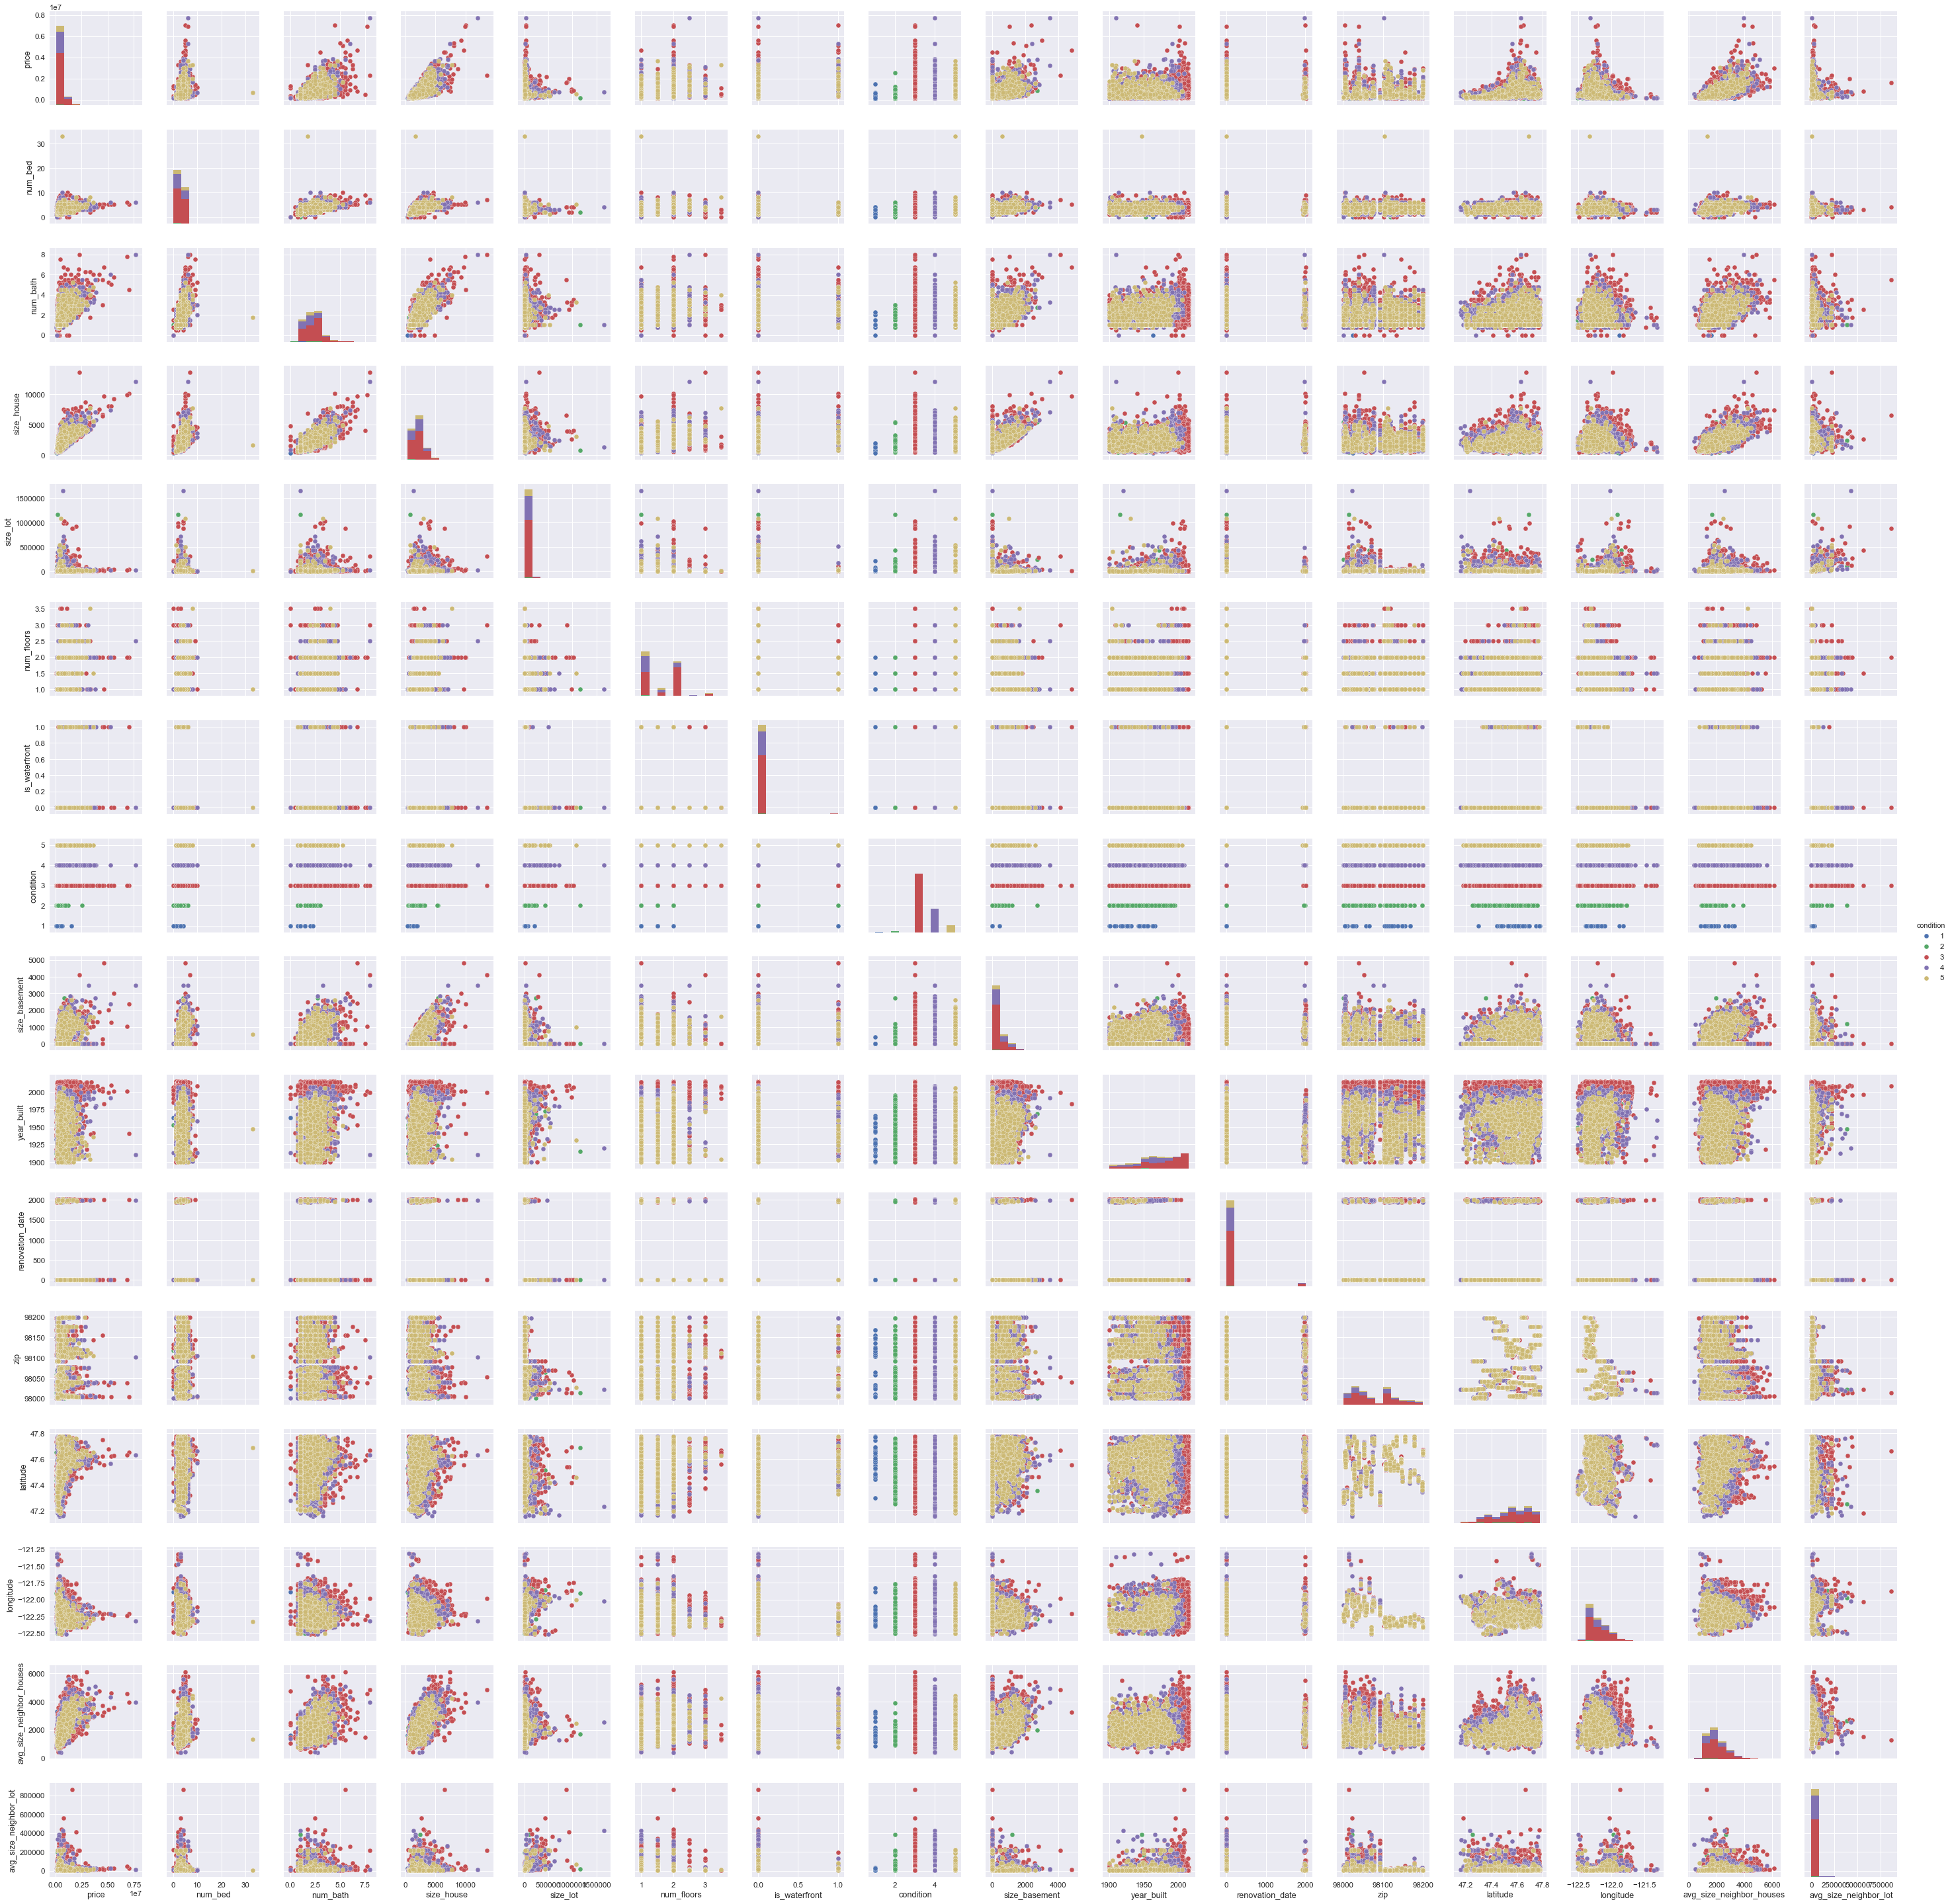

In [107]:
g = sns.pairplot(df, hue="condition")
# g.savefig('first-pairplot')

### temos mais variaveis do que eu imaginava para fazer isso no olho, vamos ver como é a correlação geral dessas variaveis ...

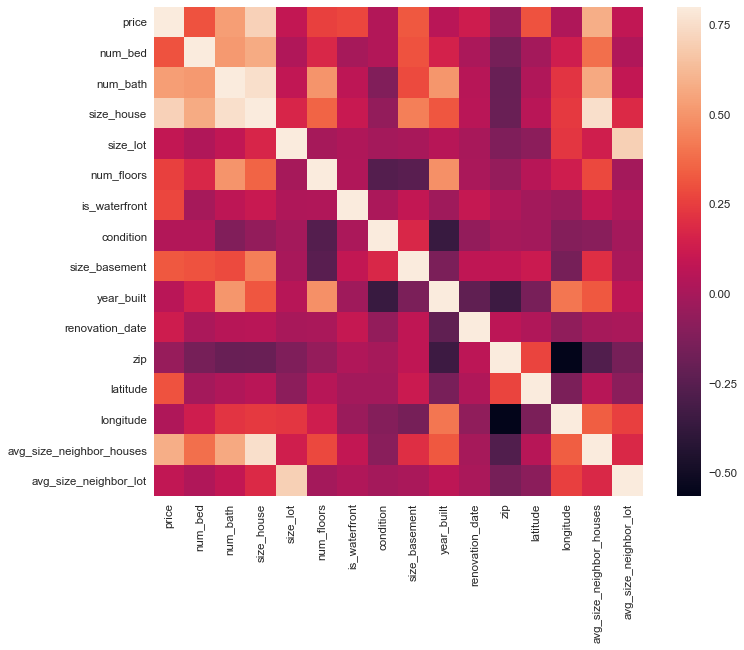

In [108]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

### Parece que muitas variaveis tem baixa correlação com as demais (pelo menos sem fazer algum tratamento) com isso vamos plotar apenas as 10 variaveis com maiores correlações com o preço.

Estranho notar a latitude e longitude sendo sendo bastante correlacionado, isso só faria sentido se a amostra for toda de uma pequena região onde haveria um gradiente de preços. Se Fosse todo os EUA, esse feito linear se anularia.

Vamos ver.

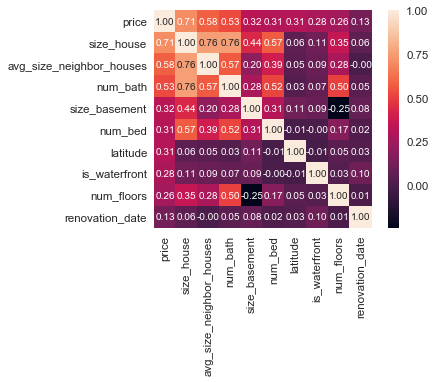

In [109]:
k = 10 # number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.15)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

### Checamos que a base não tem valores nulos: (mas tem muitos valores zero onde deveria ser nulo)

In [123]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total  Percent
avg_size_neighbor_lot         0      0.0
avg_size_neighbor_houses      0      0.0
longitude                     0      0.0
latitude                      0      0.0
zip                           0      0.0
renovation_date               0      0.0
year_built                    0      0.0
size_basement                 0      0.0
condition                     0      0.0
is_waterfront                 0      0.0
num_floors                    0      0.0
size_lot                      0      0.0
size_house                    0      0.0
num_bath                      0      0.0
num_bed                       0      0.0
price                         0      0.0

## Uma breve olhada nos dados geograficos fornecidos já nos dizem muito sobre as possibilidades dessa base.

Se tivessemos uma amostra de todo os EUA, não faria muito sentido usar autocorrelação espacial já que os efeitos são dissipados rápidamente, mas como estamos falando de uma area razoavelmente pequena, um único distrito, King County (em Washington), podemos não só usar as autocorrelações espaciais, como podemos usar os dados públicos como o censu americano ( https://www.census.gov ) e até dados de GIS (https://gis-kingcounty.opendata.arcgis.com/) para enriquecer nosso preditor de preços de venda.

Além disso, 

(mapa plotado no Tableau Public, os números nas regiões representam a quantidade unidades vendidas e a intensidade das cores é o preço médio das unidades conforme escala abaixo)

In [110]:
from bokeh.io import show
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure

longitude = df['longitude']
latitude = df['latitude']

source = ColumnDataSource(data=dict(longitude=longitude, latitude=latitude))
# source = ColumnDataSource(data=dict(longitude=longitude, latitude=latitude))

p = figure(plot_width=800, plot_height=700)
p.circle(x='longitude', y='latitude', fill_alpha=0.8,
          line_color="red", line_width=0.1, source=source)
show(p)

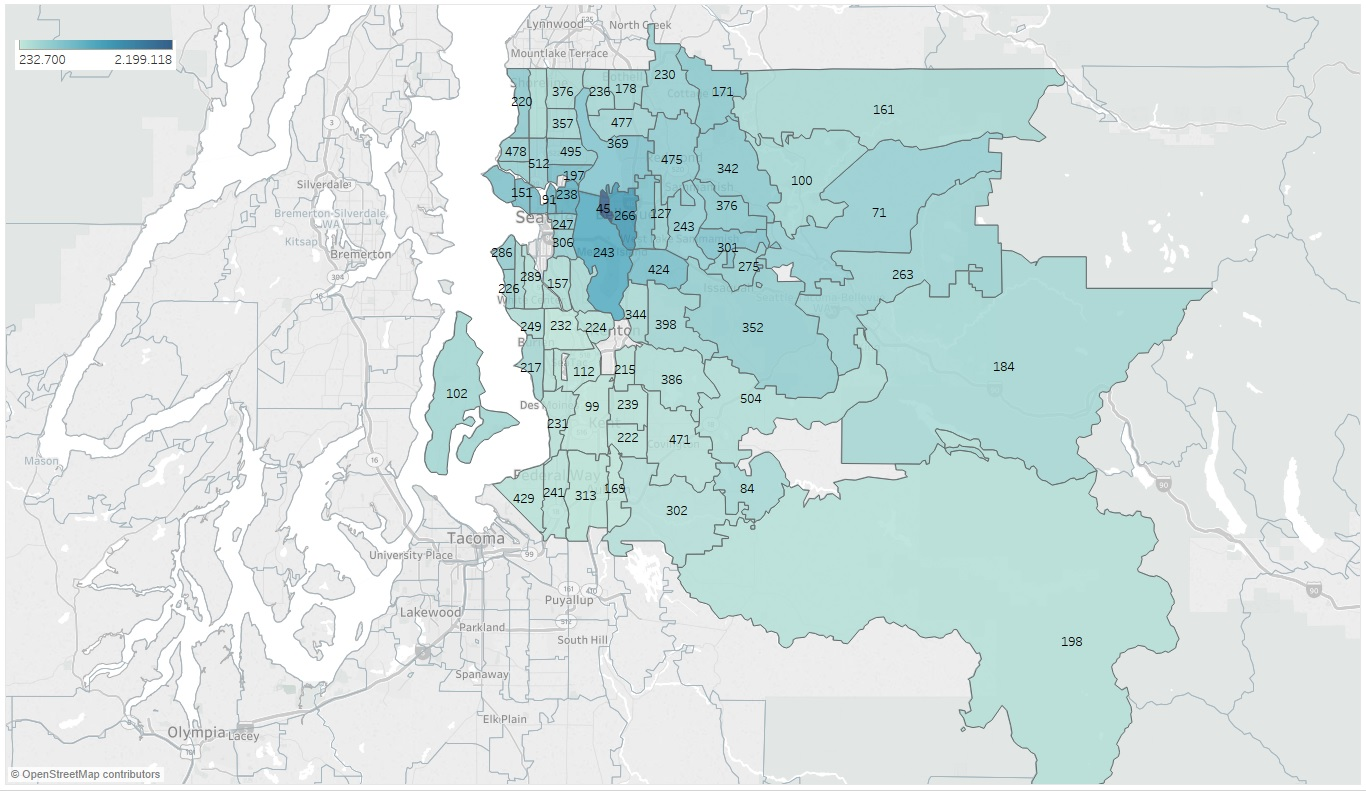

In [111]:
from IPython.display import Image
Image(filename='C:\\Users\\ABC\\Desktop\\tableau-map.jpg') 

### Por último vamos rodar uma simples regressão nos dados sem tratamento para ver como as variaveis se comportam ceteris paribus, ou seja, o valor dos betas, seus sinais e suas significancias estatisticas.

Tem muita coisa para se analisar na regressão abaixo, mas vamos deixar para as próximas com variaveis tratadas.

In [112]:
function1 = '''
price ~ num_bed
 + num_bath
 + size_house
 + size_lot
 + C(num_floors)
 + C(is_waterfront)
 + C(condition)
 + size_basement
 + renovation_date
 + avg_size_neighbor_houses
 + avg_size_neighbor_lot
'''

model1 = smf.ols(function1, df).fit()
print(model1.summary2())

                            Results: Ordinary least squares
Model:                      OLS                    Adj. R-squared:           0.582      
Dependent Variable:         price                  AIC:                      509551.5394
Date:                       2017-08-27 04:00       BIC:                      509700.1709
No. Observations:           18448                  Log-Likelihood:           -2.5476e+05
Df Model:                   18                     F-statistic:              1426.      
Df Residuals:               18429                  Prob (F-statistic):       0.00       
R-squared:                  0.582                  Scale:                    5.7904e+10 
----------------------------------------------------------------------------------------
                            Coef.     Std.Err.     t     P>|t|     [0.025       0.975]  
----------------------------------------------------------------------------------------
Intercept                -39015.6877 47751.8753  -

# 2) Engenharia de Variaveis

A maior, mais díficil e mais importante etapa.

### Embora os dados exibam um comportamento linear, a amostra é bastante heterocedastica.

Analisando o primeiro pairplor, notamos séries 'explosivas', para torna-la homocedastica podemos aplicar diversas técnicas, usaremos o mais simples que é a aplicação de log nas duas variaveis pois além deconseguimos a variância constante, temos uma interpretação de elasticidade (taxa de variação) para os parâmetros.


Abaixo a relação entre Preços e o tamanho da casa que imaginamos que tenha uma forte e positiva correlação.

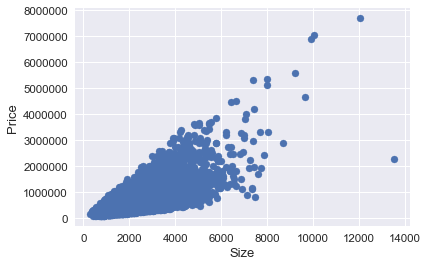

In [113]:
fig, ax = plt.subplots()
ax.scatter(x = df['size_house'], y = df['price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('Size', fontsize=13)
plt.show()

#### Descreverei como log-linearizaremos' as principais variaveis com mais detalhes e as demais será feito o procedimento (se necessário) sem explicações

Não necessáriamente precisamos ter distribuições normais para nossas amostras, mas ela ter essa caracteristica permite que façamos analises não só mais eficientes mas principalmente mais robustas já que a maioria dos algoritmos de regressões que usaremos trazem betas significativos para qualquer distribuição apenas com o primeiro momento, mas não somos capazes de fazer testes de hipótese sem o segundo momento.

C:\Users\ABC\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j



 mu = 542362.37 and sigma = 372003.44



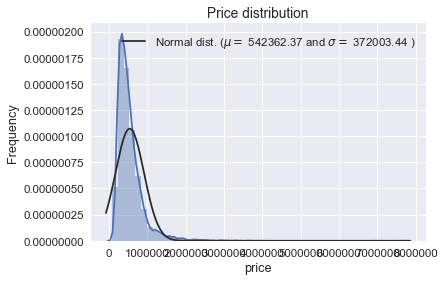

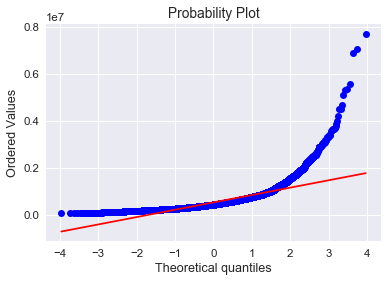

In [114]:
sns.distplot(df['price'] , fit=stats.norm);

(mu, sigma) = stats.norm.fit(df['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show()

#### E após a aplicação de logaritmo natural na variavel ...

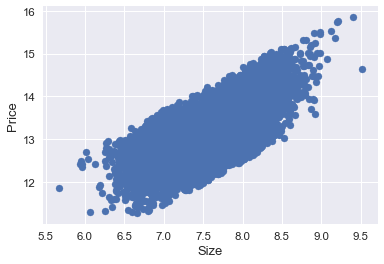

C:\Users\ABC\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j



 mu = 13.05 and sigma = 0.53



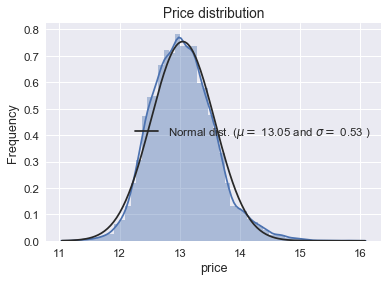

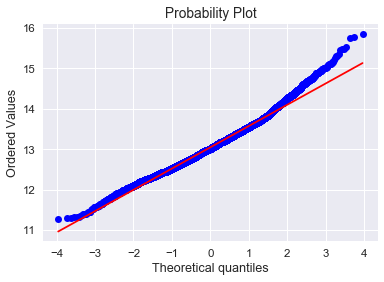

In [115]:
fig, ax = plt.subplots()
ax.scatter(x = np.log(df['size_house']), y = np.log(df['price']))
plt.ylabel('Price', fontsize=13)
plt.xlabel('Size', fontsize=13)
plt.show()

from scipy import stats

sns.distplot(np.log(df['price']) , fit=stats.norm);

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(np.log(df['price']))
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

fig = plt.figure()
res = stats.probplot(np.log(df['price']), plot=plt)
plt.show()

#### A segunda variavel com maior correlação é a média de tamanho das casas da vizinhança.
Uma forma alternatica de transformação essa informação em uma variavel explicativa interessante
é considerar não exatamente o tamanho média das casas do bairro, mas o quanto estamos proximos ou longe
da média das casas do bairro. Pois se a média é grande ou pequena mas nossa casa pode ser ainda maior ou ainda menor não fazendo a comparação relativa. Portanto vamos analisar a variavel, log-lineariza-la e criar uma nova que será uma proporção entre a venda e a sua média. 

Obs: Não faria sentido criar novas variaveis que fossem combinações lineares entre as variaveis do modelo, muitos softwares simplesmente não rodam por não conseguirem inveter a matriz de parametros (X) acusando multicolinearidade perfeita (ou em termos mais economicos, a variavel criada como combinação linear de outras não acrescenta nenhum novo poder explicativo ao modelo), neste casso criaremos um indice percentual para testarmos sua correlação com o preço.

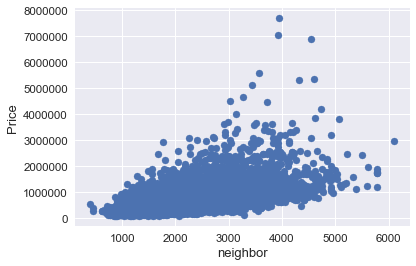

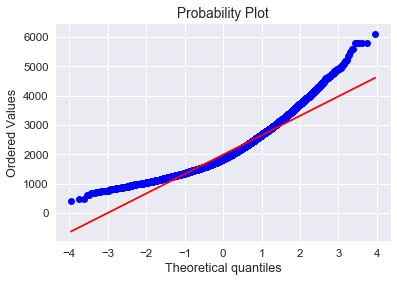

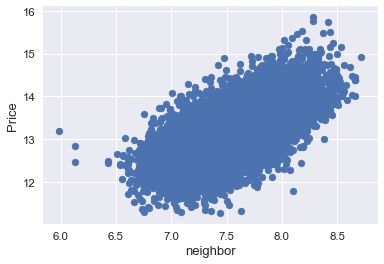

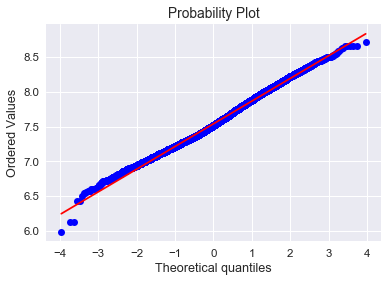

In [116]:
fig, ax = plt.subplots()
ax.scatter(x = df['avg_size_neighbor_houses'], y = df['price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('neighbor', fontsize=13)
plt.show()

res1 = stats.probplot(df['avg_size_neighbor_houses'], plot=plt)
plt.show()

fig, ax = plt.subplots()
ax.scatter(x = np.log(df['avg_size_neighbor_houses']), y = np.log(df['price']))
plt.ylabel('Price', fontsize=13)
plt.xlabel('neighbor', fontsize=13)
plt.show()

res2 = stats.probplot(np.log(df['avg_size_neighbor_houses']), plot=plt)
plt.show()

#### Embora a aplicação do log resolva facilmente alguns possíveis preblemas de distribuições 'mal comportadas' ele não resolve bem problemas de indices, pois a ideia é de que uma regressão log-log tenha variações constantes, dando a interpretação de 'ao variar nossa endógena em x% a exógena variará em \beta %'

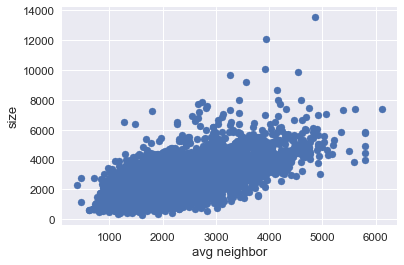

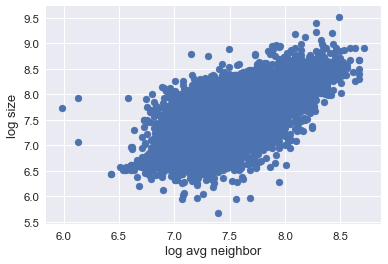

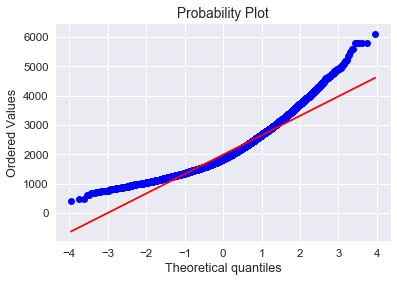

In [117]:
df2 = df.copy(deep=True)
df2['sizediff_relative_of_neighbor'] = (df2['avg_size_neighbor_houses']-df2['size_house'])/df2['size_house']

fig, ax = plt.subplots()
ax.scatter(x = df2['avg_size_neighbor_houses'], y = df2['size_house'])
plt.ylabel('size', fontsize=13)
plt.xlabel('avg neighbor', fontsize=13)
plt.show()

fig, ax = plt.subplots()
ax.scatter(x = np.log(df2['avg_size_neighbor_houses']), y = np.log(df2['size_house']))
plt.ylabel('log size', fontsize=13)
plt.xlabel('log avg neighbor', fontsize=13)
plt.show()

res0 = stats.probplot(df2['avg_size_neighbor_houses'], plot=plt)
plt.show()

#### Relação entre distancia percentual para a média e o Preço de venda
obs: essa variavel não poderá ser usada nas regressões pois um dos inputs é a variavel exógena, usamos para entender a relação da variavel principal.

C:\Users\ABC\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


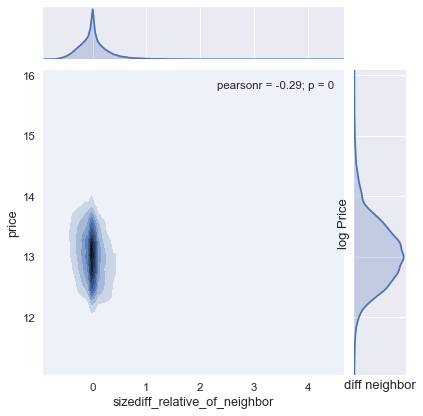

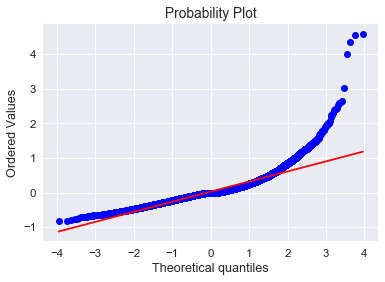

In [118]:
sns.jointplot(df2['sizediff_relative_of_neighbor'], np.log(df2['price']), kind="kde")
plt.ylabel('log Price', fontsize=13)
plt.xlabel('diff neighbor', fontsize=13)
plt.show()

res1 = stats.probplot(df2['sizediff_relative_of_neighbor'], plot=plt)
plt.show()

In [119]:
df2['log_price'] = np.log(df2['price'])
df2['log_size_house'] = np.log(df2['size_house'])
df2['size_lot']
df2['log_size_lot'] = np.log(df2['size_lot'])
df2['log_neighbor_house'] = np.log(df2['avg_size_neighbor_houses'])
df2['log_neighbor_lot'] = np.log(df2['avg_size_neighbor_lot'])
df2['log_size_basement'] = np.log(df2['size_basement'] + 1)

In [129]:
df2.head()

price  num_bed  num_bath  size_house  size_lot  num_floors  is_waterfront  \
0  221900        3      1.00        1180      5650         1.0              0   
1  538000        3      2.25        2570      7242         2.0              0   
2  180000        2      1.00         770     10000         1.0              0   
3  604000        4      3.00        1960      5000         1.0              0   
4  510000        3      2.00        1680      8080         1.0              0   

   condition  size_basement  year_built          ...            \
0          3              0        1955          ...             
1          3            400        1951          ...             
2          3              0        1933          ...             
3          5            910        1965          ...             
4          3              0        1987          ...             

   avg_size_neighbor_lot  sizediff_relative_of_neighbor  log_price  \
0                   5650                       0.135593  12.309982   
1                   7639                      -0.342412  13.195614   
2                   8062                       2.532468  12.100712   
3                   5000                      -0.306122  13.311329   
4                   7503                       0.071429  13.142166   

   log_size_house  log_size_lot  log_neighbor_house  log_neighbor_lot  \
0        7.073270      8.639411            7.200425          8.639411   
1        7.851661      8.887653            7.432484          8.941022   
2        6.646391      9.210340            7.908387          8.994917   
3        7.580700      8.517193            7.215240          8.517193   
4        7.426549      8.997147            7.495542          8.923058   

   log_size_basement  time_since_construction  time_since_renovation  
0           0.000000                 4.110874              50.000000  
1           5.993961                 4.174387               3.218876  
2           0.000000                 4.418841              50.000000  
3           6.814543                 3.931826              50.000000  
4           0.000000                 3.367296              50.000000  

[5 rows x 25 columns]

In [120]:
mask1 = (df2['year_built'] != 0)
z_valid = df2[mask1]

df2['time_since_construction'] = 50
df2.loc[mask1, 'time_since_construction'] = np.log(2016 - z_valid['year_built'])

In [121]:
mask2 = (df2['renovation_date'] != 0)
z_valid = df2[mask2]

df2['time_since_renovation'] = 50
df2.loc[mask2, 'time_since_renovation'] = np.log(2016 - z_valid['renovation_date'])

## Variaveis candidatas a Categórias (classes)

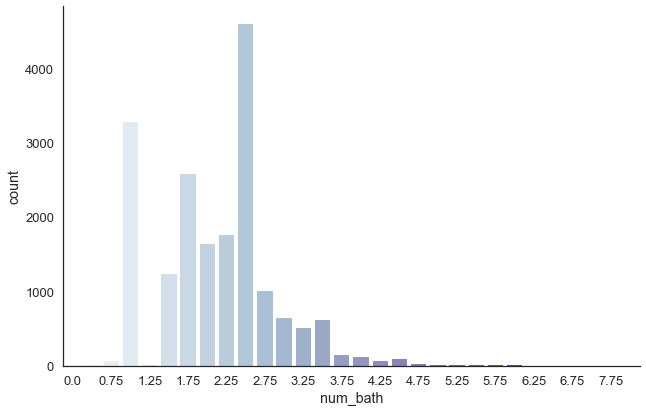

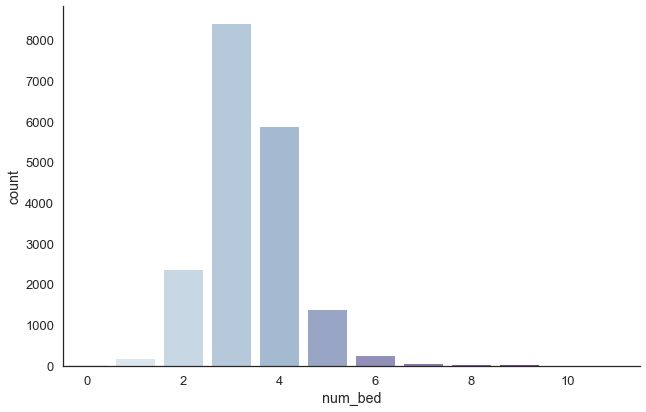

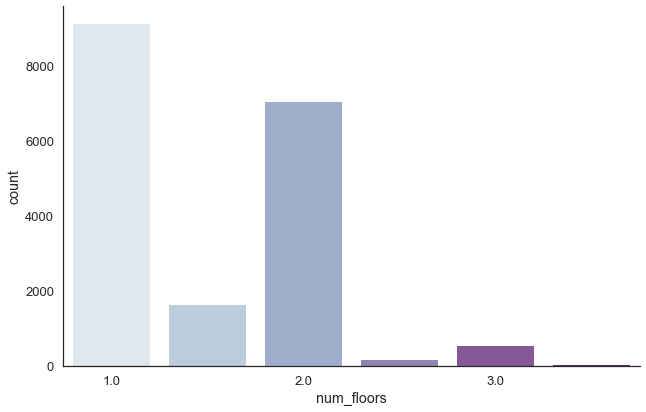

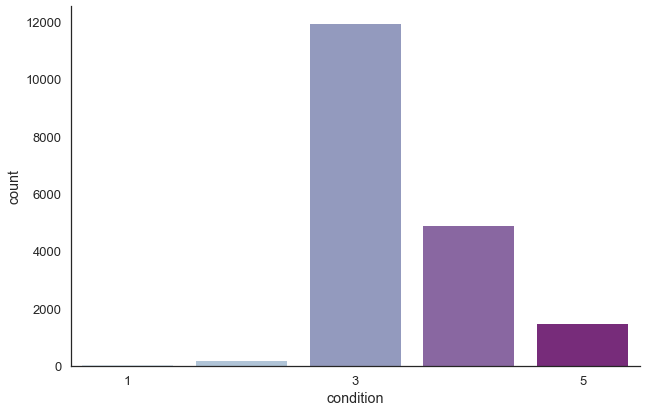

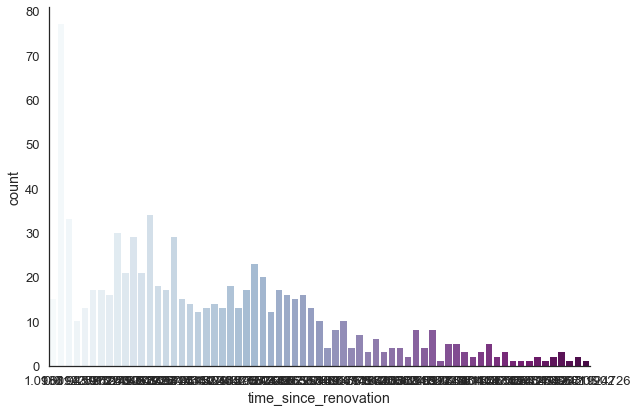

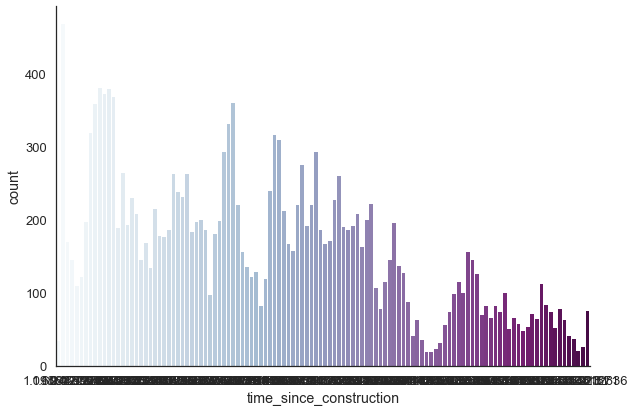

In [138]:
g = sns.factorplot(x="num_bath", data=df2, kind="count",
                   palette="BuPu", size=6, aspect=1.5)
g.set_xticklabels(step=2)

g = sns.factorplot(x="num_bed", data=df2, kind="count",
                   palette="BuPu", size=6, aspect=1.5)
g.set_xticklabels(step=2)

g = sns.factorplot(x="num_floors", data=df2, kind="count",
                   palette="BuPu", size=6, aspect=1.5)
g.set_xticklabels(step=2)

g = sns.factorplot(x="condition", data=df2, kind="count",
                   palette="BuPu", size=6, aspect=1.5)
g.set_xticklabels(step=2)

g = sns.factorplot(x="time_since_renovation", data=df2[df2['time_since_renovation']<40], kind="count",
                   palette="BuPu", size=6, aspect=1.5)
g.set_xticklabels(step=2)

g = sns.factorplot(x="time_since_construction", data=df2, kind="count",
                   palette="BuPu", size=6, aspect=1.5)
g.set_xticklabels(step=2)

In [135]:
df2.head()

price  num_bed  num_bath  size_house  size_lot  num_floors  is_waterfront  \
0  221900        3      1.00        1180      5650         1.0              0   
1  538000        3      2.25        2570      7242         2.0              0   
2  180000        2      1.00         770     10000         1.0              0   
3  604000        4      3.00        1960      5000         1.0              0   
4  510000        3      2.00        1680      8080         1.0              0   

   condition  size_basement  year_built          ...            \
0          3              0        1955          ...             
1          3            400        1951          ...             
2          3              0        1933          ...             
3          5            910        1965          ...             
4          3              0        1987          ...             

   avg_size_neighbor_lot  sizediff_relative_of_neighbor  log_price  \
0                   5650                       0.135593  12.309982   
1                   7639                      -0.342412  13.195614   
2                   8062                       2.532468  12.100712   
3                   5000                      -0.306122  13.311329   
4                   7503                       0.071429  13.142166   

   log_size_house  log_size_lot  log_neighbor_house  log_neighbor_lot  \
0        7.073270      8.639411            7.200425          8.639411   
1        7.851661      8.887653            7.432484          8.941022   
2        6.646391      9.210340            7.908387          8.994917   
3        7.580700      8.517193            7.215240          8.517193   
4        7.426549      8.997147            7.495542          8.923058   

   log_size_basement  time_since_construction  time_since_renovation  
0           0.000000                 4.110874              50.000000  
1           5.993961                 4.174387               3.218876  
2           0.000000                 4.418841              50.000000  
3           6.814543                 3.931826              50.000000  
4           0.000000                 3.367296              50.000000  

[5 rows x 25 columns]

In [95]:
function2 = '''
log_price ~ num_bed
 + num_bath
 + log_size_house
 + log_size_lot
 + C(num_floors)
 + C(is_waterfront)
 + C(condition)
 + log_size_basement
 + time_since_renovation
 + time_since_construction
 + log_neighbor_house
 + log_neighbor_lot
'''

model2 = smf.ols(function2, df2).fit()
print(model1.summary())
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     1426.
Date:                Sun, 27 Aug 2017   Prob (F-statistic):               0.00
Time:                        03:47:50   Log-Likelihood:            -2.5476e+05
No. Observations:               18448   AIC:                         5.096e+05
Df Residuals:                   18429   BIC:                         5.097e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept               

In [49]:
# Analisar se oq a base chama de vizinhança é maior/menor que o cep, pois podemos 
# fazer um groupby no cep e construir um segundo indice média apenas com os dados da base.

In [50]:
# transformar as variaveis categoricas em dummies pois nossa amostra é grande o suficiente para comportar
# a que dos graus de liberdade.

In [ ]:
columns = []
for column_name, column in df.transpose().iterrows():
    columns.append(column_name)

In [20]:
from  sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model


In [21]:
def dfSplit(df,ratio,y='price'):
    train, test = train_test_split(df, test_size = ratio)
    y_train = train[y]
    y_test = test[y]
    x_train = train.ix[:, train.columns != y]
    x_test = test.ix[:, test.columns != y]
    return x_train, y_train, x_test, y_test

In [22]:
def tPoly(df, degree=1):
    polynomial = PolynomialFeatures(degree=degree)
    return polynomial.fit_transform(df)

In [24]:
def testRegs(df, clf, degree=1,ratio=.25, y='price', metrics=[]):

    x_train,y_train,x_test,y_test = dfSplit(df,ratio)

    poly_x_train = tPoly(x_train,degree)
    poly_x_test = tPoly(x_test,degree)

    clf.fit(poly_x_train,y_train)

    y_hat = clf.predict(poly_x_test)
    # print('Coefficients: \n', reg.coef_)
    # print("Mean squared error: %.2f"
    #       % mean_squared_error(y_test, y_hat))
    print('R2: %.2f, K: %i' % (r2_score(y_test, y_hat), clf.coef_.shape[0]))

# teste
ols_simple = linear_model.LinearRegression()
testRegs(df, ols_simple,2)

R2: 0.80, K: 136


In [26]:
ridge = linear_model.Ridge()
lasso = linear_model.Lasso()
lassoL = linear_model.LassoLars()
BayesR = linear_model.BayesianRidge()
elastic = linear_model.ElasticNet()
par = linear_model.PassiveAggressiveRegressor()
perceptron_simple = linear_model.Perceptron()

In [27]:
models = [ols_simple,ridge,lasso,lassoL,BayesR,elastic,par]

In [31]:
for m in models:
    for i in range(3):
        print(testRegs(df,m,degree=i))

R2: -0.00, K: 1
None
R2: 0.66, K: 16
None
R2: 0.79, K: 136
None
R2: -0.00, K: 1
None
R2: 0.64, K: 16
None
R2: 0.79, K: 136
None
R2: -0.00, K: 1
None
R2: 0.67, K: 16
None


C:\Users\ABC\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


R2: 0.71, K: 136
None
R2: -0.00, K: 1
None
R2: 0.68, K: 16
None
R2: 0.73, K: 136
None
R2: -0.00, K: 1
None
R2: 0.67, K: 16
None
R2: 0.76, K: 136
None
R2: -0.00, K: 1
None
R2: 0.57, K: 16
None
R2: 0.74, K: 136
None
R2: -1.21, K: 1
None
R2: 0.48, K: 16
None
R2: -0.55, K: 136
None


In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [38]:
# define base model
def simple_model():
    # create model
    model = Sequential()
    model.add(Dense(15, input_dim=15, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [39]:
estimator = KerasRegressor(build_fn=simple_model, nb_epoch=50, batch_size=200, verbose=True)

x_train, y_train, x_test, y_test = dfSplit(df,.01)

kfold = KFold(n_splits=5)
results = cross_val_score(estimator, x_train.values, y_train, cv=kfold)

Epoch 1/10
14610/14610 [==============================] - 0s - loss: 429351682507.7837      
Epoch 2/10
14610/14610 [==============================] - 0s - loss: 402144836297.5058     
Epoch 3/10
14610/14610 [==============================] - 0s - loss: 341041661933.7769     
Epoch 4/10
14610/14610 [==============================] - 0s - loss: 268584461089.8179     

In [40]:
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))
t = results.mean() / results.std()
print(t)

Results: 133776046644.46 (9463189209.02) MSE
14.1364653807


In [49]:
def simple_model_with_hidden():
    model = Sequential()
    model.add(Dense(15, input_dim=15, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

estimator = KerasRegressor(build_fn=simple_model_with_hidden, nb_epoch=1000, batch_size=200, verbose=False)

x_train, y_train, x_test, y_test = dfSplit(df,.01)

kfold = KFold(n_splits=5)
results = cross_val_score(estimator, x_train.values, y_train, cv=kfold)

In [48]:
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))
t = results.mean() / results.std()
print(t)

Results: 132723408791.85 (6531963282.14) MSE
20.3190684116
